Сначала импортируем все неоходимые библиотеки

In [11]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import os
from datetime import datetime

Загрузка данных из датасета, заполнение пустых значений и вывод гистограммы

c:\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='Unnamed: 0.1', ylabel='Unnamed: 0.1'>,
        <Axes: xlabel='Unnamed: 0', ylabel='Unnamed: 0.1'>,
        <Axes: xlabel='cost_price', ylabel='Unnamed: 0.1'>,
        <Axes: xlabel='profit_markup', ylabel='Unnamed: 0.1'>,
        <Axes: xlabel='depth_of_tree', ylabel='Unnamed: 0.1'>,
        <Axes: xlabel='sales_commission', ylabel='Unnamed: 0.1'>,
        <Axes: xlabel='profit', ylabel='Unnamed: 0.1'>],
       [<Axes: xlabel='Unnamed: 0.1', ylabel='Unnamed: 0'>,
        <Axes: xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <Axes: xlabel='cost_price', ylabel='Unnamed: 0'>,
        <Axes: xlabel='profit_markup', ylabel='Unnamed: 0'>,
        <Axes: xlabel='depth_of_tree', ylabel='Unnamed: 0'>,
        <Axes: xlabel='sales_commission', ylabel='Unnamed: 0'>,
        <Axes: xlabel='profit', ylabel='Unnamed: 0'>],
       [<Axes: xlabel='Unnamed: 0.1', ylabel='cost_price'>,
        <Axes: xlabel='Unnamed: 0', ylabel='cost_price'>,
        <Axes: xlabel='cost_price'

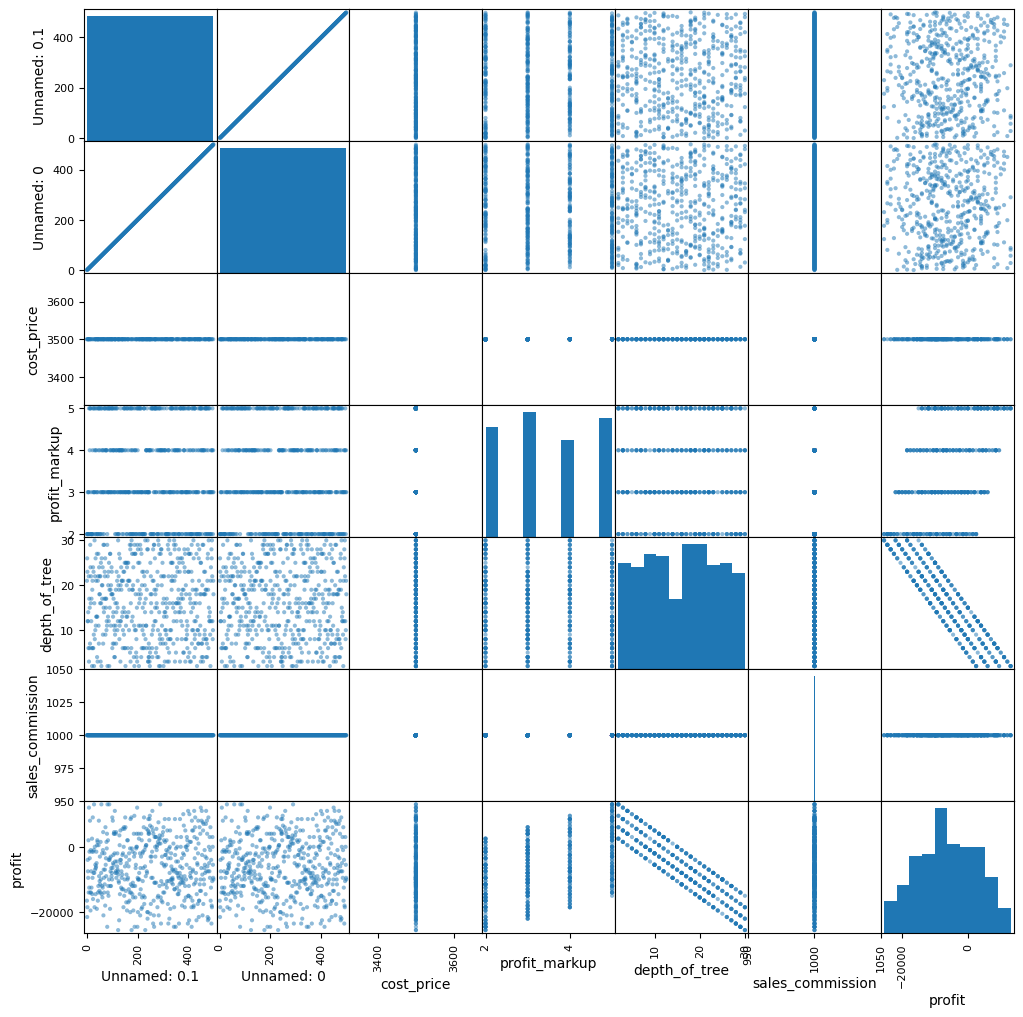

In [12]:
sheet = pd.read_csv('V8.csv')
scatter_matrix(sheet, figsize=(12,12))

In [32]:
#информация по данным датасета
print(sheet.shape)
print(sheet.dtypes)
print(sheet.describe())
print(sheet.info())

(500, 7)
Unnamed: 0.1          int64
Unnamed: 0            int64
cost_price          float64
profit_markup         int64
depth_of_tree         int64
sales_commission      int64
profit                int64
dtype: object
       Unnamed: 0.1  Unnamed: 0  cost_price  profit_markup  depth_of_tree  \
count    500.000000  500.000000       244.0     500.000000     500.000000   
mean     249.500000  250.500000      3500.0       3.498000      15.896000   
std      144.481833  144.481833         0.0       1.126292       8.095694   
min        0.000000    1.000000      3500.0       2.000000       2.000000   
25%      124.750000  125.750000      3500.0       3.000000       9.000000   
50%      249.500000  250.500000      3500.0       3.000000      16.000000   
75%      374.250000  375.250000      3500.0       5.000000      23.000000   
max      499.000000  500.000000      3500.0       5.000000      30.000000   

       sales_commission        profit  
count             500.0    500.000000  
mean   

Выводы по матрице: 
После анализа графиков приходим к выводу, что наиболее выражено показатель profit зависит от depth_of_tree и после от profit_markup
depth_of_tree принимает значения от 3 до 30, а profit_markup от 2 до 5 и является, скорее всего классификатором.

Теперь проверим показатели корреляции в виде карты температур для наглядности

                  Unnamed: 0.1  Unnamed: 0  cost_price  profit_markup  \
profit                0.004159    0.004159         NaN       0.453341   
profit_markup        -0.013048   -0.013048         NaN       1.000000   
Unnamed: 0.1          1.000000    1.000000         NaN      -0.013048   
Unnamed: 0            1.000000    1.000000         NaN      -0.013048   
depth_of_tree        -0.011018   -0.011018         NaN      -0.021562   
cost_price                 NaN         NaN         NaN            NaN   
sales_commission           NaN         NaN         NaN            NaN   

                  depth_of_tree  sales_commission    profit  
profit                -0.900905               NaN  1.000000  
profit_markup         -0.021562               NaN  0.453341  
Unnamed: 0.1          -0.011018               NaN  0.004159  
Unnamed: 0            -0.011018               NaN  0.004159  
depth_of_tree          1.000000               NaN -0.900905  
cost_price                  NaN            

<Figure size 500x500 with 0 Axes>

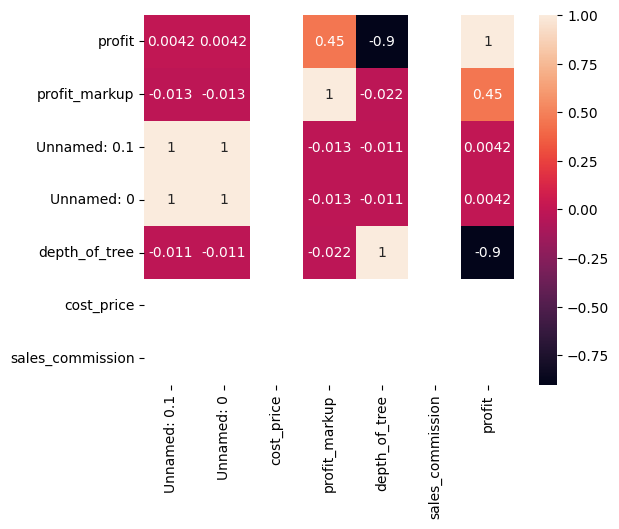

<Figure size 500x500 with 0 Axes>

In [27]:
correlation = sheet.corr().sort_values(by="profit",ascending=False)
sns.heatmap(correlation, vmax=1, square=True, annot= True) 
print(correlation)
plt.figure(figsize=(5,5))

и Shape, dtypes

In [29]:
print(sheet.shape)
print(sheet.dtypes)

(500, 7)
Unnamed: 0.1          int64
Unnamed: 0            int64
cost_price          float64
profit_markup         int64
depth_of_tree         int64
sales_commission      int64
profit                int64
dtype: object


In [34]:
sheet = pd.read_csv('V8.csv')
filtered_sheet  = sheet
filtered_sheet['cost_price'].fillna(3500, inplace=True)

sheet_x = filtered_sheet.iloc[:,:6]
sheet_y= filtered_sheet['profit']#profit index in headers oh filtering stage

bestfeatures = SelectKBest(f_regression, k=3)
fit = bestfeatures.fit(sheet_x, sheet_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(sheet_x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis =1)
print(featureScores)

                  0            0
0      Unnamed: 0.1     0.008614
1        Unnamed: 0     0.008614
2        cost_price     0.000000
3     profit_markup   128.823664
4     depth_of_tree  2145.721436
5  sales_commission     0.000000


Все столбцы со значением модуля кореляции <0.4 исключаем из выборки. Оставляем только dept_of_tree и profit_murkup

In [ ]:
filtered_sheet  = sheet[['depth_of_tree', 'profit_markup']]
filtered_sheet["profit"] = sheet['profit']

Далее ризбиваем датасет на тренировочную, тестовую и валидационную части:
1. Весь датасет в исходном виде
2. весь датасет в Нормализированном виде
3. Только столбцы со значением кореляции >= 0.4 в исходном виде
4. Только столбцы со значением кореляции >= 0.4 в Нормализованном виде

In [20]:

def get_raw_train_test_and_val_data():
    sheet = pd.read_csv('V8.csv')
    filtered_sheet  = sheet
    filtered_sheet['cost_price'].fillna(3500, inplace=True)

    sheet_x = filtered_sheet.iloc[:,:6]
    sheet_y= filtered_sheet['profit']#profit index in headers oh filtering stage

    seed =7
    test_size = 0.2
    val_size = 0.25
    x_train, x_test, y_train, y_test = train_test_split(sheet_x, sheet_y, test_size = test_size, random_state = seed)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = val_size, random_state = seed)
    return x_train, y_train, x_test, y_test, x_val, y_val 


def get_normalized_train_test_and_val_data():
    sheet = pd.read_csv('V8.csv')
    filtered_sheet  = sheet
    filtered_sheet['cost_price'].fillna(3500, inplace=True)

    #Нормализация
    scaler = Normalizer().fit(filtered_sheet)
    rescaled_sheet = pd.DataFrame(scaler.fit_transform(filtered_sheet))
    rescaled_sheet = rescaled_sheet.rename(columns={0:'Unnamed: 0', 1:"cost_price", 2:'profit_markup', 3: "3",
                                                    4:"depth_of_tree", 5:"sales_commission", 6:"profit"})
    #print(rescaled_sheet)

    #раделение наборов на тренировочный и тестовый и проверочный
    sheet_x = rescaled_sheet.iloc[:,:6]
    sheet_y= rescaled_sheet['profit']#profit index in headers oh filtering stage

    seed =7
    test_size = 0.2
    val_size = 0.25
    x_train, x_test, y_train, y_test = train_test_split(sheet_x, sheet_y, test_size = test_size, random_state = seed)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = val_size, random_state = seed)

    return x_train, y_train, x_test, y_test, x_val, y_val 

def get_raw_filtered_train_test_and_val_data():
    sheet = pd.read_csv('V8.csv')
    filtered_sheet  = sheet[['depth_of_tree', 'profit_markup']]
    filtered_sheet["profit"] = sheet['profit']

    sheet_x = filtered_sheet.iloc[:,:2]
    sheet_y= filtered_sheet['profit']#profit index in headers oh filtering stage

    seed =7
    test_size = 0.2
    val_size = 0.25
    x_train, x_test, y_train, y_test = train_test_split(sheet_x, sheet_y, test_size = test_size, random_state = seed)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = val_size, random_state = seed)
    return x_train, y_train, x_test, y_test, x_val, y_val 



def get_normalized_filtered_train_test_and_val_data():
    sheet = pd.read_csv('V8.csv')
    filtered_sheet  = sheet[['depth_of_tree', 'profit_markup']]
    #filtered_sheet["type_to_depth_rel"] = sheet['profit_markup']/sheet["depth_of_tree"]
    filtered_sheet["profit"] = sheet['profit']

    #Нормализация
    scaler = Normalizer().fit(filtered_sheet)
    rescaled_sheet = pd.DataFrame(scaler.fit_transform(filtered_sheet))
    rescaled_sheet = rescaled_sheet.rename(columns={0:'depth_of_tree', 1:"profit_markup", 2:'profit'})
    #print(rescaled_sheet)

    #раделение наборов на тренировочный и тестовый и проверочный
    sheet_x = rescaled_sheet.iloc[:,:2]
    sheet_y= rescaled_sheet['profit']#profit index in headers oh filtering stage

    seed =7
    test_size = 0.2
    val_size = 0.25
    x_train, x_test, y_train, y_test = train_test_split(sheet_x, sheet_y, test_size = test_size, random_state = seed)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = val_size, random_state = seed)

    return x_train, y_train, x_test, y_test, x_val, y_val 



Пример нормализованных данных

In [35]:
x1_train, y1_train, x1_test, y1_test, x1_val, y1_val = get_normalized_filtered_train_test_and_val_data()
print(x1_train) 

     depth_of_tree  profit_markup
167       0.004750       0.001250
380       0.000500       0.000500
357       0.002875       0.000625
224       0.001500       0.000833
102       0.000875       0.000625
..             ...            ...
116       0.001474       0.000211
263       0.001273       0.000121
298       0.001471       0.000176
255       0.006000       0.001667
144       0.001243       0.000108

[300 rows x 2 columns]


C:\Users\kosty\AppData\Local\Temp\ipykernel_19352\3066247637.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sheet["profit"] = sheet['profit']


Теперь используем каждый набор для обучения и проверки для Линейной регрессионной модели и Простой рекурентной сети, все результаты вывожу в main_output.txt, который прикреплен ниже

In [39]:

for data_function in [
    get_normalized_filtered_train_test_and_val_data,
    get_normalized_train_test_and_val_data,
    get_raw_filtered_train_test_and_val_data,
    get_raw_train_test_and_val_data]:

    x_train, y_train, x_test, y_test, x_val, y_val = data_function()
    model = Sequential()
    model.add(SimpleRNN(150, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(Dense(1))  # Выходной слой

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Обучение модели
    model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

    # Прогнозирование
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_val_pred = model.predict(x_val)

    # Оценка модели
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)
    
    with open('output.txt', 'a+') as output_file:
        output_file.write(f"Data function: {data_function.__name__}\n")
        output_file.write(f"Train RMSE for RMM: {rmse_train}\n")
        output_file.write(f"Train R2 Score for RMM: {r2_train}\n")
        output_file.write(f"Test RMSE for RMM: {rmse_test}\n")
        output_file.write(f"Test R2 Score for RMM: {r2_test}\n")
        output_file.write(f"Valid RMSE for RMM: {rmse_val}\n")
        output_file.write(f"Valid R2 Score for RMM: {r2_val}\n")

        


    model = LinearRegression()
    model.fit(x_train, y_train)

    y_prediction = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_val_pred = model.predict(x_val)
        # Оценка модели
    rmse_train = np.sqrt(mean_squared_error(y_train, y_prediction))
    r2_train = r2_score(y_train, y_train_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    
    with open('output.txt', 'a+') as output_file:
        output_file.write('\n')
        output_file.write(f"Data function: {data_function.__name__}\n")
        output_file.write(f"Train RMSE for LIN: {rmse_train}\n")
        output_file.write(f"Train R2 Score for LIN: {r2_train}\n")
        output_file.write(f"Test RMSE for LIN: {rmse_test}\n")
        output_file.write(f"Test R2 Score for LIN: {r2_test}\n")
        output_file.write(f"Valid RMSE for LIN: {rmse_val}\n")
        output_file.write(f"Valid R2 Score for LIN: {r2_val}\n\n")
        output_file.write("#################################\n\n")


Epoch 1/100


C:\Users\kosty\AppData\Local\Temp\ipykernel_19352\3066247637.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sheet["profit"] = sheet['profit']
c:\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.9350 - val_loss: 0.9208
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8390 - val_loss: 0.8886
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7225 - val_loss: 0.9497
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7603 - val_loss: 0.9362
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6874 - val_loss: 0.9280
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7117 - val_loss: 0.9228
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7591 - val_loss: 0.9113
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7085 - val_loss: 0.9257
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7977 - val_loss: 0.9228
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7581 - val_loss: 0.9352
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6842 - val_loss: 0.9459
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6730 - val_l

c:\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.6412 - val_loss: 0.6763
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5665 - val_loss: 0.5743
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4741 - val_loss: 0.4988
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4005 - val_loss: 0.4425
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3984 - val_loss: 0.4272
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3679 - val_loss: 0.4403
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3884 - val_loss: 0.4708
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3443 - val_loss: 0.4466
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3926 - val_loss: 0.4431
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3551 - val_loss: 0.4351
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4000 - val_loss: 0.4489
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3952 - va

C:\Users\kosty\AppData\Local\Temp\ipykernel_19352\1528193652.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sheet["profit"] = sheet['profit']
c:\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 117539672.0000 - val_loss: 100487032.0000
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 114399640.0000 - val_loss: 100324072.0000
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 122350480.0000 - val_loss: 100097200.0000
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 117172928.0000 - val_loss: 99782048.0000
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 110890568.0000 - val_loss: 99332208.0000
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 116801280.0000 - val_loss: 98719976.0000
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 109310208.0000 - val_loss: 97913776.0000
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 112056496.0000 - val_loss: 96854280.0000
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 111792728.0000 - val_loss: 95525920.0000
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 114678400.0000 - val_loss: 93844184.0000
Epoch

c:\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 112542496.0000 - val_loss: 86712896.0000
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 90505232.0000 - val_loss: 82369264.0000
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 80097912.0000 - val_loss: 83244256.0000
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 79739496.0000 - val_loss: 78910640.0000
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 77703648.0000 - val_loss: 82691720.0000
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 76613816.0000 - val_loss: 79414160.0000
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 78103304.0000 - val_loss: 80435840.0000
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 81297912.0000 - val_loss: 81277672.0000
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 79587896.0000 - val_loss: 79290112.0000
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 78945120.0000 - val_loss: 80729352.0000
Epoch 11/100
1

Data function: get_normalized_filtered_train_test_and_val_data
Train RMSE for RMM: 0.848774516586352
Train R2 Score for RMM: 0.012722836356066636
Test RMSE for RMM: 0.8524575872633607
Test R2 Score for RMM: 0.004387565095532842
Valid RMSE for RMM: 0.9635019326604529
Valid R2 Score for RMM: -0.043098173632926784

Data function: get_normalized_filtered_train_test_and_val_data
Train RMSE for LIN: 0.8463698938368819
Train R2 Score for LIN: 0.012722836356066636
Test RMSE for LIN: 0.8486124842807905
Test R2 Score for LIN: 0.013348945861240136
Valid RMSE for LIN: 0.9577990579588952
Valid R2 Score for LIN: -0.030786722625869567

#################################

Data function: get_normalized_train_test_and_val_data
Train RMSE for RMM: 0.6082312335455607
Train R2 Score for RMM: 0.24723947923703393
Test RMSE for RMM: 0.6403289897773484
Test R2 Score for RMM: 0.21802481301434373
Valid RMSE for RMM: 0.6599144929490788
Valid R2 Score for RMM: 0.23494782828847383

Data function: get_normalized_train_test_and_val_data
Train RMSE for LIN: 1.6191067002584813e-15
Train R2 Score for LIN: 0.24723947923703393
Test RMSE for LIN: 1.3586063663551436e-15
Test R2 Score for LIN: 1.0
Valid RMSE for LIN: 1.5716078479182352e-15
Valid R2 Score for LIN: 1.0

#################################

Data function: get_raw_filtered_train_test_and_val_data
Train RMSE for RMM: 4352.555709962286
Train R2 Score for RMM: 0.7584350109100342
Test RMSE for RMM: 4546.948981217921
Test R2 Score for RMM: 0.7803929448127747
Valid RMSE for RMM: 4251.690028763383
Valid R2 Score for RMM: 0.7695342898368835

Data function: get_raw_filtered_train_test_and_val_data
Train RMSE for LIN: 5.590773000065283e-12
Train R2 Score for LIN: 0.7584350109100342
Test RMSE for LIN: 5.580669050436904e-12
Test R2 Score for LIN: 1.0
Valid RMSE for LIN: 5.834295089763624e-12
Valid R2 Score for LIN: 1.0

#################################

Data function: get_raw_train_test_and_val_data
Train RMSE for RMM: 8850.598237682996
Train R2 Score for RMM: 0.0011723637580871582
Test RMSE for RMM: 9809.438631839781
Test R2 Score for RMM: -0.0221024751663208
Valid RMSE for RMM: 8949.136660853068
Valid R2 Score for RMM: -0.021046042442321777

Data function: get_raw_train_test_and_val_data
Train RMSE for LIN: 6.220238994778888e-12
Train R2 Score for LIN: 0.0011723637580871582
Test RMSE for LIN: 7.029046733931447e-12
Test R2 Score for LIN: 1.0
Valid RMSE for LIN: 5.957710976931527e-12
Valid R2 Score for LIN: 1.0

#################################



Лучшие показатели у Линейной модели с непреобразованными данными и только важной выборкой
Data function: get_raw_filtered_train_test_and_val_data
Train RMSE for RMM: 4727.4371489219175
Train R2 Score for RMM: 0.7150315046310425
Test RMSE for RMM: 4961.905480633719
Test R2 Score for RMM: 0.7384810447692871
Valid RMSE for RMM: 4731.377364287134
Valid R2 Score for RMM: 0.714597225189209

обучаем выбранную модель и делаем ее вырезку из памяти

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from pickle import dump, load
from datetime import datetime

def get_raw_filtered_train_test_and_val_data():
    sheet = pd.read_csv('V8.csv')
    filtered_sheet  = sheet[['depth_of_tree', 'profit_markup']]
    filtered_sheet["profit"] = sheet['profit']

    sheet_x = filtered_sheet.iloc[:,:2]
    sheet_y= filtered_sheet['profit']#profit index in headers oh filtering stage

    seed =7
    test_size = 0.2
    val_size = 0.25
    x_train, x_test, y_train, y_test = train_test_split(sheet_x, sheet_y, test_size = test_size, random_state = seed)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = val_size, random_state = seed)
    return x_train, y_train, x_test, y_test, x_val, y_val 

if __name__ =="__main__":
    with open('rmm_teaching_predictions.txt', 'w') as output_file:
                    output_file.write(f"{datetime.now()}\n")

    x_train, y_train, x_test, y_test, x_val, y_val = get_raw_filtered_train_test_and_val_data()
    print(x_train)

    model = LinearRegression()
  

    # Обучение модели
    model.fit(x_train, y_train)

    # Прогнозирование
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Оценка модели
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    
    with open('rmm_teaching_predictions.txt', 'a') as output_file:
        output_file.write(f"Train RMSE: {rmse_train}\n")
        output_file.write(f"Train R2 Score: {r2_train}\n")
        output_file.write(f"Test RMSE: {rmse_test}\n")
        output_file.write(f"Test R2 Score: {r2_test}\n")
        output_file.write(f"#######################\n")

    
    with open('rmm_teaching_predictions.txt', 'a') as f:
        f.write(f"actual, predicted\n")
        for actual, predicted in zip(y_test, y_test_pred):
            f.write(f"{actual}, {predicted} \n")


    filename = 'Linear.sav'
    dump(model, open(filename, 'wb'))

Подготовка дампа памяти модели для дальнейшего испольщования 

In [25]:
from joblib import load
import numpy as np


model = load('Linear.sav')

x = np.array([[6, 5]])  #Сначала depth_of_tree, затем profit_markup

y_pred = model.predict(x)

print(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
[[3841.8276]]
